In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\projects\ai_impact_on-_jobs\notebook\data\ai_impact_jobs_2010_2025.csv")

In [5]:
df.head()

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,...,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,...,0.81,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,...,0.04,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,0.71,False,High,19,Emerging
2,fc9d1854-3cbf-4bab-90df-77304dfc59df,2016,Nepal,South Asia,Sydney,Future Analytics,Startup,Finance,Product Manager,Junior,...,0.15,"Statistics, Project Management, Cloud Computin...",NaN,27035,3.55,0.86,False,High,2,Emerging
3,05c1c7d3-2add-4919-91eb-f6c78bfe23d1,2015,Spain,Europe,Nairobi,Global Technologies,Large,Government,Data Scientist,Mid,...,0.19,"Cloud Computing, SQL, Project Management, Comm...",NaN,72894,-2.80,0.70,False,Low,15,Emerging
4,5e739937-d1b0-44d7-935c-7ebb3fc1f6e8,2014,Taiwan,East Asia,Sydney,Future Technologies,Small,Manufacturing,ML Engineer,Lead,...,0.11,"SQL, Python, Communication, Software Engineeri...",NaN,57215,0.85,0.87,False,High,13,Emerging


In [6]:
print(df.shape)

(5000, 22)


In [7]:
df.isnull().sum()

job_id                                   0
posting_year                             0
country                                  0
region                                   0
city                                     0
company_name                             0
company_size                             0
industry                                 0
job_title                                0
seniority_level                          0
ai_mentioned                             0
ai_keywords                           3377
ai_intensity_score                       0
core_skills                              0
ai_skills                             3377
salary_usd                               0
salary_change_vs_prev_year_percent       0
automation_risk_score                    0
reskilling_required                      0
ai_job_displacement_risk                 0
job_description_embedding_cluster        0
industry_ai_adoption_stage               0
dtype: int64

In [8]:
#Checking for duplicates
df["job_id"].duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   job_id                              5000 non-null   object 
 1   posting_year                        5000 non-null   int64  
 2   country                             5000 non-null   object 
 3   region                              5000 non-null   object 
 4   city                                5000 non-null   object 
 5   company_name                        5000 non-null   object 
 6   company_size                        5000 non-null   object 
 7   industry                            5000 non-null   object 
 8   job_title                           5000 non-null   object 
 9   seniority_level                     5000 non-null   object 
 10  ai_mentioned                        5000 non-null   bool   
 11  ai_keywords                         1623 no

In [10]:
missing = (
    df.isna().sum().to_frame("missing_count").assign(missing_pct = lambda x : 100 * x["missing_count"]/len(df))
)

missing

,missing_count,missing_pct
job_id,0,0.00
posting_year,0,0.00
country,0,0.00
region,0,0.00
city,0,0.00
company_name,0,0.00
company_size,0,0.00
industry,0,0.00
job_title,0,0.00
seniority_level,0,0.00


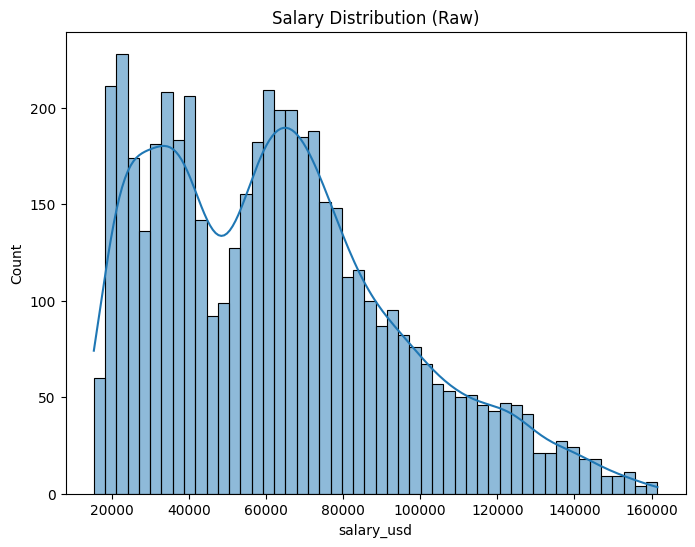

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="salary_usd", bins=50, kde=True)
plt.title("Salary Distribution (Raw)")
plt.show()

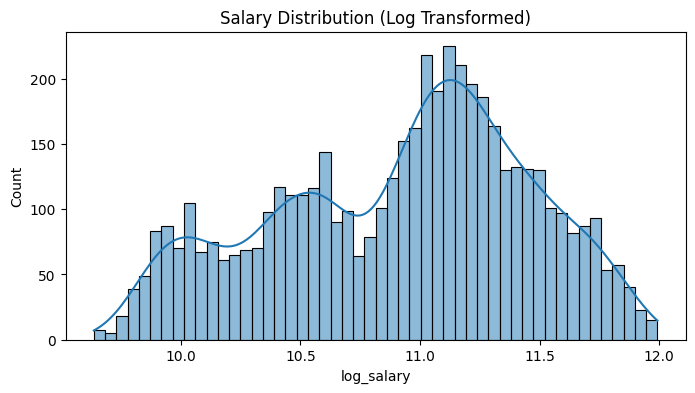

In [ ]:
df["log_salary"] = np.log1p(df["salary_usd"])

plt.figure(figsize=(8, 4))
sns.histplot(data = df, x=df["log_salary"], bins=50, kde=True)
plt.title("Salary Distribution (Log Transformed)")
plt.show()


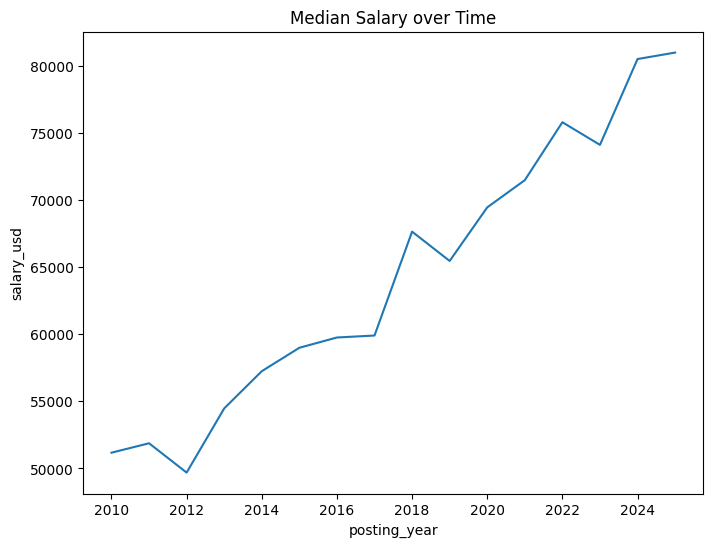

In [18]:
#Salary trend over years

salary_by_year = (
    df.groupby("posting_year")["salary_usd"].median().reset_index()
)

plt.figure(figsize=(8,6))
sns.lineplot(data=salary_by_year, x="posting_year", y="salary_usd")
plt.title("Median Salary over Time")
plt.show()

In [19]:
cat_cols = [
    "country", "industry", "job_title",
    "seniority_level", "company_size"
]

df[cat_cols].nunique().sort_values(ascending=False)


country            44
job_title          10
industry            9
seniority_level     6
company_size        5
dtype: int64

In [20]:
def rare_categories(col, threshold=0.01):
    freq = df[col].value_counts(normalize=True)
    return freq[freq < threshold]

rare_categories("job_title")


Series([], Name: proportion, dtype: float64)

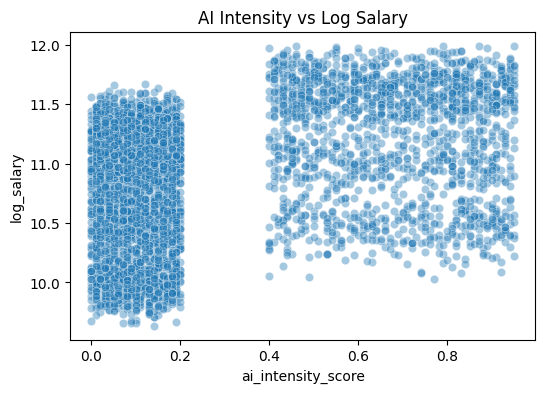

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="ai_intensity_score",
    y="log_salary",
    alpha=0.3

)
plt.title("AI Intensity vs Log Salary")
plt.show()


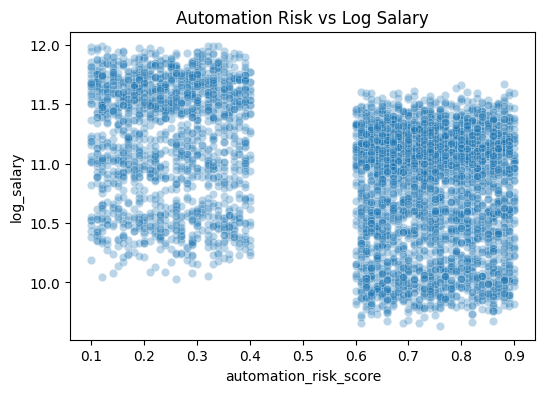

In [26]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="automation_risk_score",
    y="log_salary",
    alpha=0.3
)
plt.title("Automation Risk vs Log Salary")
plt.show()


In [27]:
text_cols = ["core_skills", "ai_skills", "ai_keywords"]

for col in text_cols:
    print(f"\n{col}")
    print("Missing %:", df[col].isna().mean() * 100)
    print("Avg length:", df[col].dropna().str.len().mean())



core_skills
Missing %: 0.0
Avg length: 62.4822

ai_skills
Missing %: 67.54
Avg length: 32.06284658040666

ai_keywords
Missing %: 67.54
Avg length: 32.06284658040666


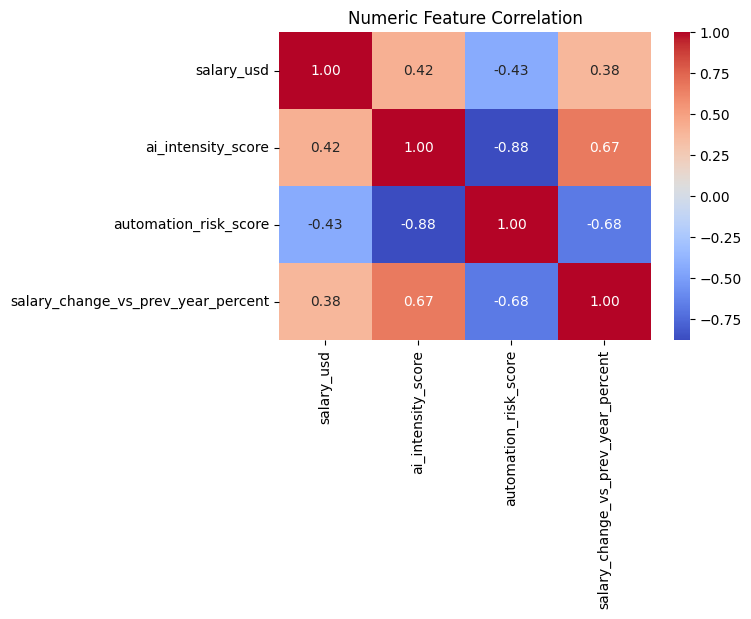

In [28]:
num_cols = [
    "salary_usd",
    "ai_intensity_score",
    "automation_risk_score",
    "salary_change_vs_prev_year_percent"
]

plt.figure(figsize=(6, 4))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Numeric Feature Correlation")
plt.show()


In [29]:
df["posting_year"].describe()


count    5000.000000
mean     2017.519400
std         4.638569
min      2010.000000
25%      2013.000000
50%      2017.000000
75%      2022.000000
max      2025.000000
Name: posting_year, dtype: float64

In [30]:
# Suggested time-based split
train_df = df[df["posting_year"] <= 2022]
val_df   = df[df["posting_year"] == 2023]
test_df  = df[df["posting_year"] >= 2024]

len(train_df), len(val_df), len(test_df)


(4039, 319, 642)

In [31]:
for col in text_cols:
    df[col] = df[col].fillna("")


In [32]:
df

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,...,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage,log_salary
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,...,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing,11.028206
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,...,"Research, SQL, Business Analysis, Python, Clou...",,62045,-3.98,0.71,False,High,19,Emerging,11.035631
2,fc9d1854-3cbf-4bab-90df-77304dfc59df,2016,Nepal,South Asia,Sydney,Future Analytics,Startup,Finance,Product Manager,Junior,...,"Statistics, Project Management, Cloud Computin...",,27035,3.55,0.86,False,High,2,Emerging,10.204925
3,05c1c7d3-2add-4919-91eb-f6c78bfe23d1,2015,Spain,Europe,Nairobi,Global Technologies,Large,Government,Data Scientist,Mid,...,"Cloud Computing, SQL, Project Management, Comm...",,72894,-2.80,0.70,False,Low,15,Emerging,11.196775
4,5e739937-d1b0-44d7-935c-7ebb3fc1f6e8,2014,Taiwan,East Asia,Sydney,Future Technologies,Small,Manufacturing,ML Engineer,Lead,...,"SQL, Python, Communication, Software Engineeri...",,57215,0.85,0.87,False,High,13,Emerging,10.954589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45aa223b-3ed6-4574-bd07-294a1443c02b,2022,Singapore,Southeast Asia,Bangalore,Prime Analytics,Enterprise,Education,ML Engineer,Intern,...,"SQL, Project Management, Data Analysis",,41317,4.62,0.88,False,Low,17,Growing,10.629054
4996,9f69f4ce-5fe9-44db-9541-478ebe28422b,2018,Chile,South America,Sydney,Future Analytics,Large,Healthcare,Policy Analyst,Senior,...,"Software Engineering, Statistics, Business Ana...",,37089,-4.26,0.79,False,Low,13,Growing,10.521103
4997,0ec6f97e-6dc3-468c-b2a2-ecc087bf067e,2019,Australia,Oceania,Bangalore,Global Solutions,Large,Education,ML Engineer,Mid,...,"Project Management, Data Analysis, Business An...",,81651,-4.95,0.64,False,Low,19,Growing,11.310222
4998,ad529cef-b22e-4e7d-82fd-98fc06d61596,2016,Sweden,Europe,Sydney,NextGen Systems,Enterprise,Energy,AI Researcher,Junior,...,"SQL, Research, Cloud Computing, Communication,...","computer vision, MLOps",107897,-0.23,0.33,True,Low,14,Emerging,11.588942


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   job_id                              5000 non-null   object 
 1   posting_year                        5000 non-null   int64  
 2   country                             5000 non-null   object 
 3   region                              5000 non-null   object 
 4   city                                5000 non-null   object 
 5   company_name                        5000 non-null   object 
 6   company_size                        5000 non-null   object 
 7   industry                            5000 non-null   object 
 8   job_title                           5000 non-null   object 
 9   seniority_level                     5000 non-null   object 
 10  ai_mentioned                        5000 non-null   bool   
 11  ai_keywords                         5000 no

In [34]:
df.shape

(5000, 23)